In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import anndata as ad

import scanpy as sc

In [2]:
plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3
#sc.set_figure_params(dpi=200, dpi_save=300)
# sc.logging.print_versions()

In [3]:
DATA_DIR = os.path.join(os.getcwd(), 'data')

In [4]:
ind1_df = pd.read_csv(os.path.join(DATA_DIR, "GSE113099_individual.1.grch.fpkm.matrix.no.doublets.or.empty.txt"),
                      sep='\t', index_col=0)

ind1_df.head()

,L1_I1_BAS_A1,L1_I1_BAS_A2,L1_I1_BAS_A3,L1_I1_BAS_A4,L1_I1_BAS_A5,L1_I1_BAS_A6,L1_I1_BAS_A7,L1_I1_BAS_A8,L1_I1_BAS_A9,L1_I1_BAS_A10,...,L4_I1_LUM_G6,L4_I1_LUM_G10,L4_I1_LUM_G11,L4_I1_LUM_H1,L4_I1_LUM_H4,L4_I1_LUM_H5,L4_I1_LUM_H7,L4_I1_LUM_H10,L4_I1_LUM_H11,L4_I1_LUM_H12
RP11-27G14.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
MADD,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,337.44,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
MAST2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.43,0.0,0.0
TRBJ2-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
TRBJ2-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0


In [5]:
ind1_df.shape

(33694, 296)

In [6]:
ind1_df.describe()

,L1_I1_BAS_A1,L1_I1_BAS_A2,L1_I1_BAS_A3,L1_I1_BAS_A4,L1_I1_BAS_A5,L1_I1_BAS_A6,L1_I1_BAS_A7,L1_I1_BAS_A8,L1_I1_BAS_A9,L1_I1_BAS_A10,...,L4_I1_LUM_G6,L4_I1_LUM_G10,L4_I1_LUM_G11,L4_I1_LUM_H1,L4_I1_LUM_H4,L4_I1_LUM_H5,L4_I1_LUM_H7,L4_I1_LUM_H10,L4_I1_LUM_H11,L4_I1_LUM_H12
count,3.369400e+04,33694.000000,33694.000000,33694.000000,33694.00000,33694.000000,33694.000000,33694.000000,33694.000000,33694.000000,...,33694.000000,33694.000000,33694.000000,33694.000000,33694.000000,33694.000000,33694.000000,33694.000000,33694.000000,33694.000000
mean,7.474675e+01,30.727527,24.871530,27.666049,33.17309,26.653066,24.755372,30.432897,29.382933,38.304929,...,27.949770,33.682366,30.450103,29.395536,25.713865,34.932597,27.714809,23.504072,41.199782,42.147078
std,7.073737e+03,546.080953,968.967172,656.617104,569.75940,318.969753,1175.648062,884.295104,317.788166,1603.913321,...,624.994306,1073.655171,926.962552,442.525939,831.600515,934.163164,1009.747678,372.811615,2370.932354,2539.712002
min,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.146227e+06,43069.480000,143109.110000,102148.020000,43403.37000,21880.570000,156004.600000,150007.980000,17070.450000,145329.570000,...,83889.830000,103660.050000,66235.470000,58863.010000,56660.430000,108560.390000,109191.760000,34198.690000,262163.930000,295158.460000


In [7]:
ind1_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 33694 entries, RP11-27G14.4 to COL18A1
Columns: 296 entries, L1_I1_BAS_A1 to L4_I1_LUM_H12
dtypes: float64(296)
memory usage: 76.3+ MB


In [8]:
ind2_df = pd.read_csv(os.path.join(DATA_DIR, "GSE113127_individual.2.grch.fpkm.matrix.no.doublets.or.empty.txt"),
                      sep='\t', index_col=0)
ind2_df.head()

,L1_I2_BAS_A1,L1_I2_BAS_A2,L1_I2_BAS_A4,L1_I2_BAS_A5,L1_I2_BAS_A7,L1_I2_BAS_A8,L1_I2_BAS_A9,L1_I2_BAS_A10,L1_I2_BAS_A11,L1_I2_BAS_B2,...,L3_I2_BAS_H2,L3_I2_BAS_H3,L3_I2_BAS_H4,L3_I2_BAS_H5,L3_I2_BAS_H6,L3_I2_BAS_H7,L3_I2_BAS_H8,L3_I2_BAS_H9,L3_I2_BAS_H10,L3_I2_BAS_H11
RP11-27G14.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MADD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MAST2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TRBJ2-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TRBJ2-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
ind2_df.shape

(33694, 246)

In [10]:
ind2_df.describe()

,L1_I2_BAS_A1,L1_I2_BAS_A2,L1_I2_BAS_A4,L1_I2_BAS_A5,L1_I2_BAS_A7,L1_I2_BAS_A8,L1_I2_BAS_A9,L1_I2_BAS_A10,L1_I2_BAS_A11,L1_I2_BAS_B2,...,L3_I2_BAS_H2,L3_I2_BAS_H3,L3_I2_BAS_H4,L3_I2_BAS_H5,L3_I2_BAS_H6,L3_I2_BAS_H7,L3_I2_BAS_H8,L3_I2_BAS_H9,L3_I2_BAS_H10,L3_I2_BAS_H11
count,33694.00000,33694.000000,33694.000000,33694.000000,33694.000000,33694.000000,33694.000000,33694.000000,33694.000000,33694.000000,...,33694.000000,33694.000000,33694.000000,33694.000000,33694.000000,33694.000000,33694.000000,33694.000000,33694.000000,33694.000000
mean,29.69122,40.631473,38.401762,30.425075,31.336460,46.707517,29.583748,41.147838,44.585633,24.373522,...,33.321706,44.324231,40.133615,24.146978,41.637933,33.865447,27.825416,35.608371,45.717216,43.784090
std,2751.56022,1147.971153,2314.019085,307.332742,551.428437,2687.444887,341.863464,2118.088660,2635.090516,1030.634596,...,1282.934327,2698.739453,2163.316642,217.411234,2139.745177,622.639528,383.302620,1006.123186,2925.588036,2565.764247
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,488622.67000,117711.310000,232920.370000,17021.020000,49973.890000,272113.350000,20036.250000,288249.380000,259966.120000,182544.400000,...,116601.740000,338955.000000,216269.540000,10629.040000,185637.810000,54722.670000,31175.820000,101230.280000,381542.610000,288360.430000


In [11]:
ind2_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33694 entries, RP11-27G14.4 to COL18A1
Columns: 246 entries, L1_I2_BAS_A1 to L3_I2_BAS_H11
dtypes: float64(246)
memory usage: 63.5+ MB


In [12]:
ind3_df = pd.read_csv(os.path.join(DATA_DIR, "GSE113198_individual.3.grch.fpkm.matrix.no.doublets.or.empty.txt"),
                      sep='\t', index_col=0)

ind3_df.head()

,L1_I3_BAS_A1,L1_I3_BAS_A2,L1_I3_BAS_A3,L1_I3_BAS_A4,L1_I3_BAS_A5,L1_I3_BAS_A6,L1_I3_BAS_A7,L1_I3_BAS_A8,L1_I3_BAS_A9,L1_I3_BAS_A10,...,L5_I3_BAS_G8,L5_I3_BAS_G9,L5_I3_BAS_G10,L5_I3_BAS_G11,L5_I3_BAS_G12,L5_I3_BAS_H1,L5_I3_BAS_H2,L5_I3_BAS_H5,L5_I3_BAS_H8,L5_I3_BAS_H12
RP11-27G14.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
MADD,0.0,0.0,0.2,0.0,0.0,0.0,0.0,22.58,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.29,0.0,0.0,0.0
MAST2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
TRBJ2-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
TRBJ2-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0


In [13]:
ind3_df.shape

(33694, 325)

In [14]:
ind3_df.describe()

,L1_I3_BAS_A1,L1_I3_BAS_A2,L1_I3_BAS_A3,L1_I3_BAS_A4,L1_I3_BAS_A5,L1_I3_BAS_A6,L1_I3_BAS_A7,L1_I3_BAS_A8,L1_I3_BAS_A9,L1_I3_BAS_A10,...,L5_I3_BAS_G8,L5_I3_BAS_G9,L5_I3_BAS_G10,L5_I3_BAS_G11,L5_I3_BAS_G12,L5_I3_BAS_H1,L5_I3_BAS_H2,L5_I3_BAS_H5,L5_I3_BAS_H8,L5_I3_BAS_H12
count,33694.000000,33694.000000,33694.000000,33694.000000,33694.000000,33694.000000,33694.000000,33694.000000,33694.000000,33694.000000,...,33694.000000,33694.000000,33694.000000,33694.000000,33694.000000,33694.000000,33694.000000,33694.000000,33694.000000,33694.000000
mean,33.763220,26.721755,29.841442,32.108812,35.257206,26.974531,31.805181,30.751645,31.081913,29.738514,...,30.051100,37.959978,30.572414,27.968671,30.545472,35.204569,30.227361,26.015619,30.905330,26.901630
std,739.003912,341.170189,594.793955,766.268523,943.319591,448.124763,527.792951,709.250166,600.947858,645.592345,...,587.271804,1669.684482,484.081289,400.631448,474.171351,1303.439757,528.964572,395.722098,517.820052,362.373464
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,81396.350000,38767.480000,87524.660000,108202.930000,132113.860000,37494.000000,51395.640000,90629.890000,67227.360000,86846.740000,...,70865.490000,188379.140000,38778.960000,40527.580000,45516.790000,127613.820000,49590.410000,44140.730000,41680.110000,29303.240000


In [15]:
ind3_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33694 entries, RP11-27G14.4 to COL18A1
Columns: 325 entries, L1_I3_BAS_A1 to L5_I3_BAS_H12
dtypes: float64(325)
memory usage: 83.8+ MB


## Preprocessing with Scanpy

In [16]:
ind1_transpose = ind1_df.T
print(ind1_transpose.head())
ind2_transpose = ind2_df.T
ind3_transpose = ind3_df.T

              RP11-27G14.4  MADD  MAST2  TRBJ2-5  TRBJ2-4  TRBJ2-3  TRBJ2-2P   
L1_I1_BAS_A1           0.0   0.0    0.0      0.0      0.0      0.0       0.0  \
L1_I1_BAS_A2           0.0   0.0    0.0      0.0      0.0      0.0       0.0   
L1_I1_BAS_A3           0.0   0.0    0.0      0.0      0.0      0.0       0.0   
L1_I1_BAS_A4           0.0   4.5    0.0      0.0      0.0      0.0       0.0   
L1_I1_BAS_A5           0.0   0.0    0.0      0.0      0.0      0.0       0.0   

              TRBJ2-2  TRBJ2-1  ZNF32  ...  SCGB2A1  VPS8  GOLPH3L  TMEM123   
L1_I1_BAS_A1      0.0      0.0    0.0  ...      0.0   0.0     0.00     0.00  \
L1_I1_BAS_A2      0.0      0.0    0.0  ...      0.0   0.0     0.00     0.00   
L1_I1_BAS_A3      0.0      0.0    0.0  ...      0.0   0.0     0.00     0.00   
L1_I1_BAS_A4      0.0      0.0    0.0  ...      0.0   0.0   265.65     2.03   
L1_I1_BAS_A5      0.0      0.0    0.0  ...      0.0   0.0     0.00   338.94   

              HORMAD1  OAZ3  RBM10  RP11-181

In [17]:
import numpy as np
from scipy.stats import median_abs_deviation

def is_outlier(adata, metric: str, nmads: int):
    M = adata.obs[metric]
    outlier = (M < np.median(M) - nmads * median_abs_deviation(M)) | (np.median(M) + nmads * median_abs_deviation(M) < M)
    return outlier



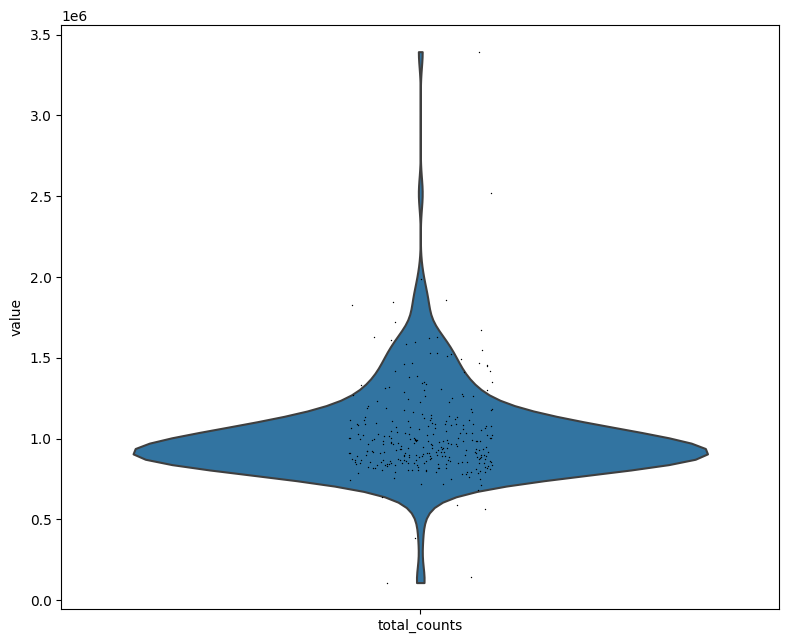

filtered out 95 cells that have less than 900 genes expressed
filtered out 17727 genes that are detected in less than 3 cells
Outliers:  outlier
False    183
True      18
Name: count, dtype: int64
(201, 15967)


In [18]:
adata_tmp = ad.AnnData(ind1_transpose)

sc.pp.calculate_qc_metrics(
    adata_tmp, inplace=True, percent_top=[20], log1p=True
)
sc.pl.violin(adata_tmp, 'total_counts')

sc.pp.filter_cells(adata_tmp, min_genes=900)
sc.pp.filter_genes(adata_tmp, min_cells=3)
# sc.pp.filter_cells(adata_temp, min_genes=900)
# adata.obs['donor'] = ['I1']*len(ind1_transpose)

adata_tmp.obs["outlier"] = (
    is_outlier(adata_tmp, "log1p_total_counts", 5)
    | is_outlier(adata_tmp, "log1p_n_genes_by_counts", 5)
    | is_outlier(adata_tmp, "pct_counts_in_top_20_genes", 5)
)
print("Outliers: ", adata_tmp.obs.outlier.value_counts())

print(adata_tmp.shape)

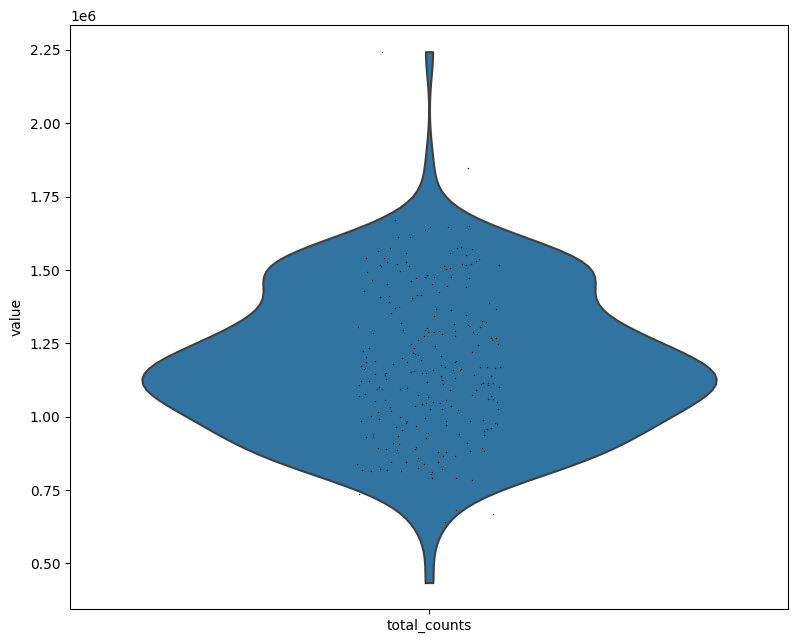

filtered out 39 cells that have less than 900 genes expressed
filtered out 17685 genes that are detected in less than 3 cells
Outliers:  outlier
False    206
True       1
Name: count, dtype: int64
(207, 16009)


In [19]:
adata_tmp1 = ad.AnnData(ind2_transpose)

sc.pp.calculate_qc_metrics(
    adata_tmp1, inplace=True, percent_top=[20], log1p=True
)
sc.pl.violin(adata_tmp1, 'total_counts')

sc.pp.filter_cells(adata_tmp1, min_genes=900)
sc.pp.filter_genes(adata_tmp1, min_cells=3)
# sc.pp.filter_cells(adata_tmp1, min_genes=900)

adata_tmp1.obs["outlier"] = (
    is_outlier(adata_tmp1, "log1p_total_counts", 5)
    | is_outlier(adata_tmp1, "log1p_n_genes_by_counts", 5)
    | is_outlier(adata_tmp1, "pct_counts_in_top_20_genes", 5)
)
print("Outliers: ", adata_tmp1.obs.outlier.value_counts())

print(adata_tmp1.shape)

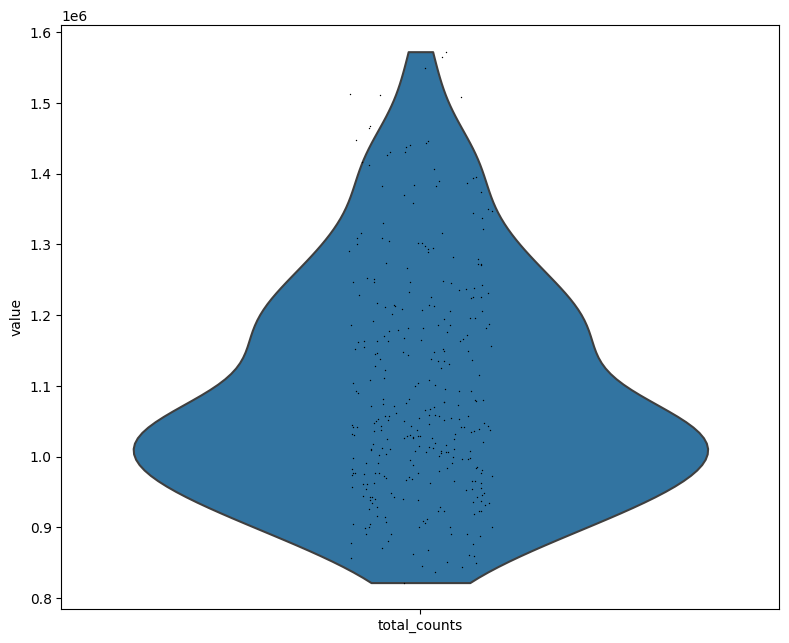

filtered out 1 cells that have less than 900 genes expressed
filtered out 15394 genes that are detected in less than 3 cells
Outliers:  outlier
False    308
True      16
Name: count, dtype: int64
(324, 18300)


In [20]:
adata_tmp2 = ad.AnnData(ind3_transpose)

sc.pp.calculate_qc_metrics(
    adata_tmp2, inplace=True, percent_top=[20], log1p=True
)
sc.pl.violin(adata_tmp2, 'total_counts')

sc.pp.filter_cells(adata_tmp2, min_genes=900)
sc.pp.filter_genes(adata_tmp2, min_cells=3)
# sc.pp.filter_cells(adata_tmp2, min_genes=900)

adata_tmp2.obs["outlier"] = (
    is_outlier(adata_tmp2, "log1p_total_counts", 5)
    | is_outlier(adata_tmp2, "log1p_n_genes_by_counts", 5)
    | is_outlier(adata_tmp2, "pct_counts_in_top_20_genes", 5)
)
print("Outliers: ", adata_tmp2.obs.outlier.value_counts())

print(adata_tmp2.shape)
# adata_tmp.obs['donor'] = ['I2']*len(ind2_transpose)
# print(len(adata_tmp))

In [21]:
adatas = [adata_tmp, adata_tmp1, adata_tmp2]
adata = sc.AnnData.concatenate(*adatas, join='outer', fill_value=0, index_unique=None)
adata.var_names_make_unique()
print(adata.shape)

/home/daphne/.pyenv/versions/3.9.1/envs/machineLearningProjects/lib/python3.9/site-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


(732, 19085)


In [22]:
adata.obs_names

Index(['L1_I1_BAS_A2', 'L1_I1_BAS_A4', 'L1_I1_BAS_A5', 'L1_I1_BAS_A6',
       'L1_I1_BAS_A8', 'L1_I1_BAS_A9', 'L1_I1_BAS_A10', 'L1_I1_BAS_B2',
       'L1_I1_BAS_B3', 'L1_I1_BAS_B4',
       ...
       'L5_I3_BAS_G8', 'L5_I3_BAS_G9', 'L5_I3_BAS_G10', 'L5_I3_BAS_G11',
       'L5_I3_BAS_G12', 'L5_I3_BAS_H1', 'L5_I3_BAS_H2', 'L5_I3_BAS_H5',
       'L5_I3_BAS_H8', 'L5_I3_BAS_H12'],
      dtype='object', length=732)

In [23]:
print(adata.obs['n_genes'].mean())
print(adata.obs[adata.obs['n_genes'] > 4500].n_genes.max())

4278.602459016393
7743


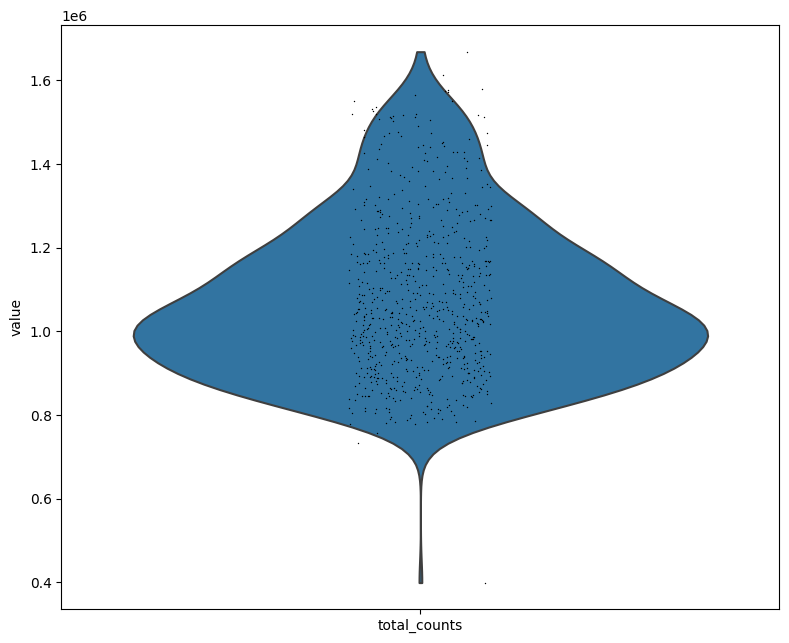

In [24]:
sc.pp.calculate_qc_metrics(
    adata, inplace=True, percent_top=[20], log1p=True
)
sc.pl.violin(adata, 'total_counts')

In [25]:
# sc.pp.filter_cells(adata, min_genes=900)
# sc.pp.filter_genes(adata, min_cells=3)
print(adata.var_names)
print(adata.obs)

Index(['A1BG', 'A1BG-AS1', 'A2M', 'A2M-AS1', 'A2ML1', 'A2ML1-AS2', 'A4GALT',
       'AAAS', 'AACS', 'AAED1',
       ...
       'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX', 'ZZEF1',
       'ZZZ3', 'bP-21264C1.2'],
      dtype='object', length=19085)
               n_genes_by_counts  log1p_n_genes_by_counts  total_counts   
L1_I1_BAS_A2                1234                 7.118826    1033693.40  \
L1_I1_BAS_A4                2903                 7.973844     931083.06   
L1_I1_BAS_A5                 989                 6.897705    1117726.71   
L1_I1_BAS_A6                2894                 7.970740     895012.50   
L1_I1_BAS_A8                2176                 7.685703    1018479.23   
...                          ...                      ...           ...   
L5_I3_BAS_H1                4517                 8.415825    1186116.25   
L5_I3_BAS_H2                6380                 8.761080    1017084.39   
L5_I3_BAS_H5                6394                 8.763272    

In [26]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.scale(adata)
adata

normalizing counts per cell
    finished (0:00:00)


AnnData object with n_obs × n_vars = 732 × 19085
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'n_genes', 'outlier', 'batch'
    var: 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'n_cells-0', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'log1p_total_counts-1', 'n_cells-1', 'n_cells_by_counts-2', 'mean_counts-2', 'log1p_mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'log1p_total_counts-2', 'n_cells-2', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mean', 'std'
    uns: 'log1p'

In [27]:
df = pd.DataFrame(adata.X, columns=adata.var_names)
df['cluster_label'] = pd.DataFrame(['' for _ in range(df.shape[0])])

for idx, row in df.iterrows():
    cell_name = adata.obs_names[idx]
    if cell_name.find('BAS') > -1:
        df['cluster_label'].loc[idx] = 'BAS'
    elif cell_name.find('LUM') > -1:
        if cell_name.find('L1') > -1:
            df['cluster_label'].loc[idx] = 'L1'
        else:
            df['cluster_label'].loc[idx] = 'L2'
df

/tmp/ipykernel_34087/3764335467.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_label'].loc[idx] = 'BAS'
/tmp/ipykernel_34087/3764335467.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_label'].loc[idx] = 'BAS'
/tmp/ipykernel_34087/3764335467.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_label'].loc[idx] = 'BAS'
/tmp/ipykernel_34087/3764335467.py:7: SettingWithCopyWarning: 
A value is tr

,A1BG,A1BG-AS1,A2M,A2M-AS1,A2ML1,A2ML1-AS2,A4GALT,AAAS,AACS,AAED1,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,bP-21264C1.2,cluster_label
0,-0.310208,-0.142892,-0.625667,-0.142294,-0.245542,-0.430177,-0.12459,-0.318402,-0.944169,-0.803211,...,-0.108323,-0.249746,-0.293794,-0.738557,-0.592906,-0.698449,-0.150112,-0.557439,-0.425188,BAS
1,4.401176,-0.142892,0.646985,-0.142294,-0.245542,-0.430177,-0.12459,-0.318402,-0.944169,0.035584,...,-0.108323,-0.249746,-0.293794,-0.738557,-0.592906,-0.698449,0.626777,-0.557439,-0.425188,BAS
2,-0.310208,-0.142892,-0.625667,-0.142294,-0.245542,-0.430177,-0.12459,-0.318402,-0.944169,-0.803211,...,-0.108323,-0.249746,-0.293794,-0.738557,-0.592906,-0.698449,-1.419328,-0.557439,-0.425188,BAS
3,-0.310208,-0.142892,2.712657,-0.142294,-0.245542,-0.430177,-0.12459,-0.318402,-0.386057,0.196171,...,-0.108323,-0.249746,-0.293794,1.010347,1.198620,-0.698449,2.686002,-0.557439,-0.425188,BAS
4,-0.310208,-0.142892,-0.625667,-0.142294,-0.245542,-0.430177,-0.12459,-0.318402,-0.944169,-0.803211,...,-0.108323,-0.249746,-0.293794,-0.738557,-0.592906,-0.698449,-1.419328,-0.557439,-0.425188,BAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,-0.310208,-0.142892,-0.354268,-0.142294,5.573088,1.416670,-0.12459,-0.318402,0.389784,0.166791,...,-0.108323,-0.249746,-0.293794,2.527958,-0.365154,-0.698449,0.735180,-0.557439,-0.425188,BAS
728,-0.310208,-0.142892,0.517107,-0.142294,0.870183,-0.430177,-0.12459,-0.318402,0.699617,2.054262,...,-0.108323,-0.249746,-0.293794,0.864134,-0.144401,1.416613,0.763773,-0.557439,-0.425188,BAS
729,-0.310208,-0.142892,2.099601,-0.142294,-0.245542,-0.430177,-0.12459,-0.318402,0.750190,1.792868,...,-0.108323,-0.249746,0.707471,-0.325674,-0.340898,1.797057,1.508990,1.541782,-0.425188,BAS
730,2.910592,-0.142892,2.073206,-0.142294,0.525100,2.556902,-0.12459,-0.318402,-0.944169,0.040917,...,-0.108323,-0.249746,-0.293794,1.092796,-0.470023,-0.040414,1.820682,1.189868,2.738359,BAS


In [28]:
print(df['cluster_label'].value_counts())

df.to_csv(os.path.join(DATA_DIR, 'dummy_labeled_ind1-3.csv'))

cluster_label
BAS    432
L2     262
L1      38
Name: count, dtype: int64


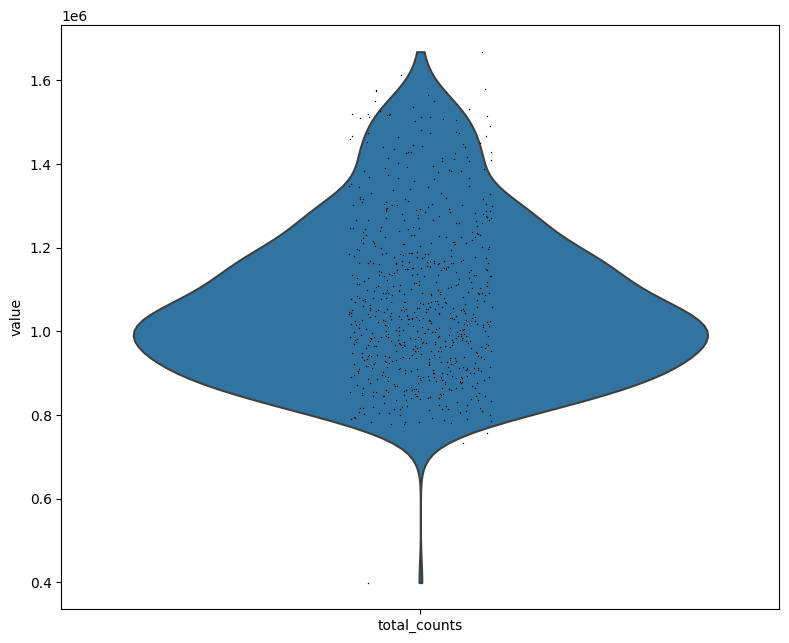

In [29]:
sc.pl.violin(adata, 'total_counts')

In [30]:
# identify high variable genes for the PCA
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
# adata.var["highly_variable"] = adata.var["highly_deviant"]

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


<Axes: xlabel='mean expressions of genes', ylabel='dispersions of genes (not normalized)'>

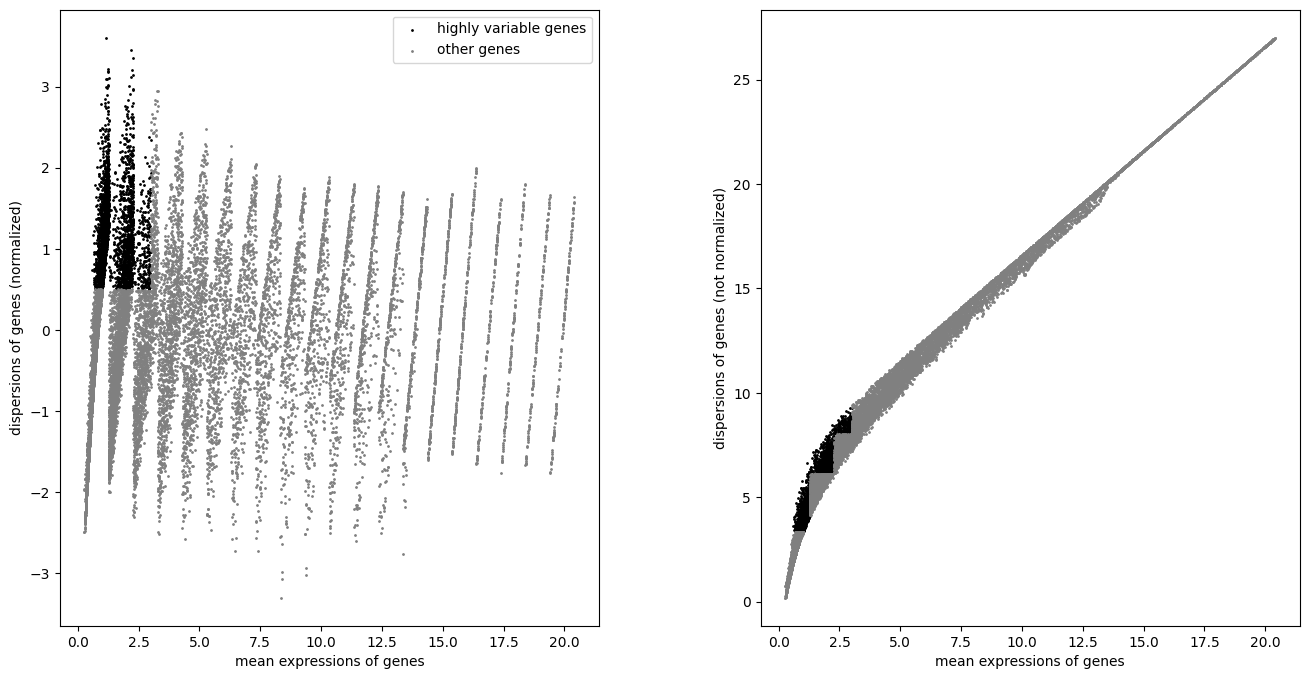

In [31]:
sc.pl.highly_variable_genes(adata, show=False)


computing PCA
    on highly variable genes
    with n_comps=2
    finished (0:00:00)


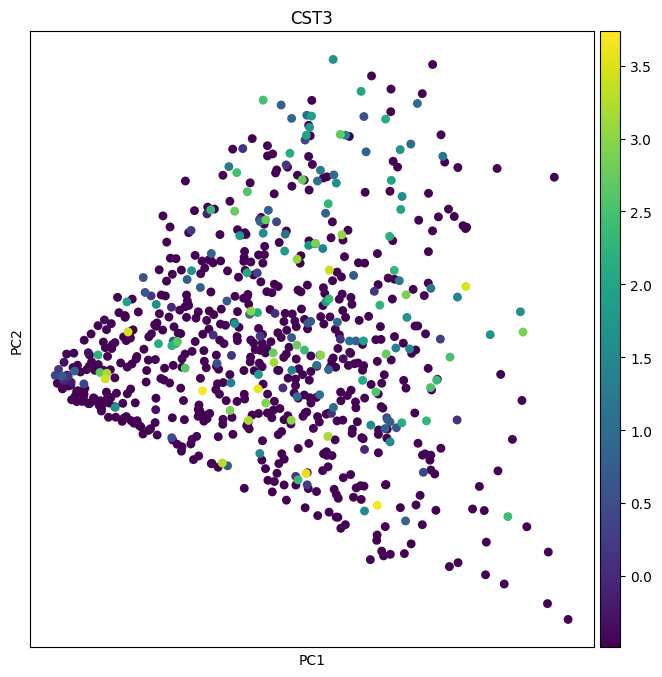

In [32]:
# perform PCA using the identified highly variable genes
sc.tl.pca(adata, svd_solver='arpack', use_highly_variable=True, n_comps=2)
sc.pl.pca(adata, color='CST3')

In [33]:
print(adata.obs_names)
print(adata.var_names)
adata

Index(['L1_I1_BAS_A2', 'L1_I1_BAS_A4', 'L1_I1_BAS_A5', 'L1_I1_BAS_A6',
       'L1_I1_BAS_A8', 'L1_I1_BAS_A9', 'L1_I1_BAS_A10', 'L1_I1_BAS_B2',
       'L1_I1_BAS_B3', 'L1_I1_BAS_B4',
       ...
       'L5_I3_BAS_G8', 'L5_I3_BAS_G9', 'L5_I3_BAS_G10', 'L5_I3_BAS_G11',
       'L5_I3_BAS_G12', 'L5_I3_BAS_H1', 'L5_I3_BAS_H2', 'L5_I3_BAS_H5',
       'L5_I3_BAS_H8', 'L5_I3_BAS_H12'],
      dtype='object', length=732)
Index(['A1BG', 'A1BG-AS1', 'A2M', 'A2M-AS1', 'A2ML1', 'A2ML1-AS2', 'A4GALT',
       'AAAS', 'AACS', 'AAED1',
       ...
       'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX', 'ZZEF1',
       'ZZZ3', 'bP-21264C1.2'],
      dtype='object', length=19085)


AnnData object with n_obs × n_vars = 732 × 19085
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'n_genes', 'outlier', 'batch'
    var: 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'n_cells-0', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'log1p_total_counts-1', 'n_cells-1', 'n_cells_by_counts-2', 'mean_counts-2', 'log1p_mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'log1p_total_counts-2', 'n_cells-2', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mean', 'std', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [34]:
# Construct neighbor graph
sc.pp.neighbors(adata, n_pcs=2)
sc.tl.leiden(adata)

computing neighbors
    using 'X_pca' with n_pcs = 2
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:08)
running Leiden clustering
    finished: found 17 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


/home/daphne/.pyenv/versions/3.9.1/envs/machineLearningProjects/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/daphne/.pyenv/versions/3.9.1/envs/machineLearningProjects/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/daphne/.

In [35]:
adata

AnnData object with n_obs × n_vars = 732 × 19085
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'n_genes', 'outlier', 'batch', 'leiden'
    var: 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'n_cells-0', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'log1p_total_counts-1', 'n_cells-1', 'n_cells_by_counts-2', 'mean_counts-2', 'log1p_mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'log1p_total_counts-2', 'n_cells-2', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'mean', 'std', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'leiden'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

computing tSNE
    using 'X_pca' with n_pcs = 2
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:02)


/home/daphne/.pyenv/versions/3.9.1/envs/machineLearningProjects/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


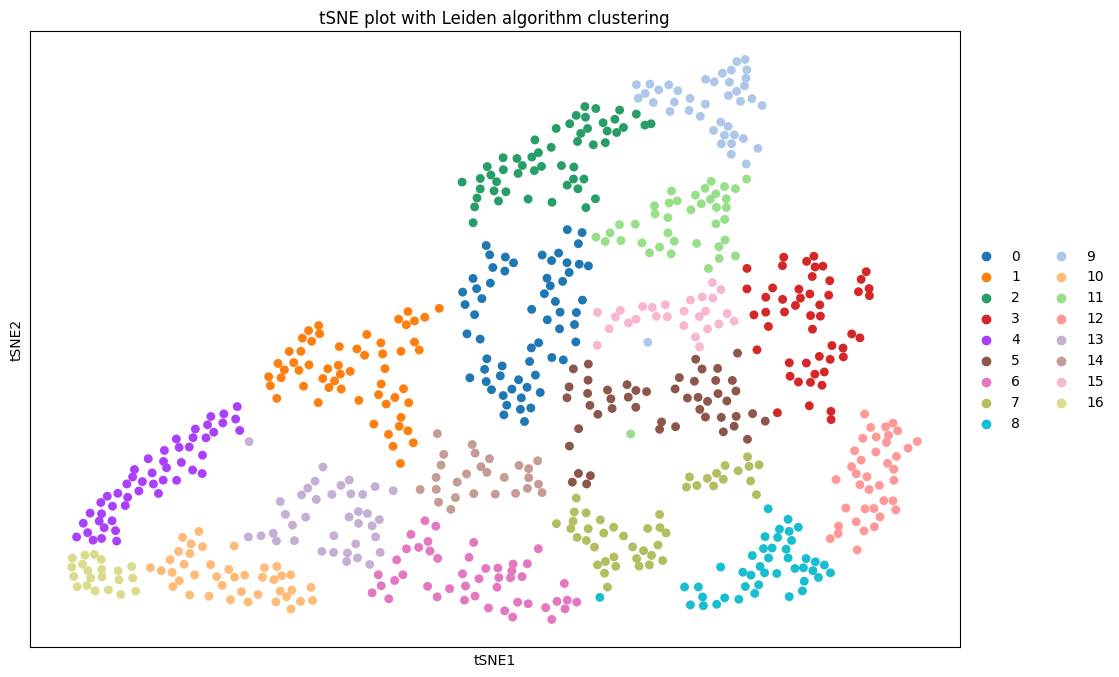

In [36]:

sc.tl.tsne(adata, n_pcs=2)

fig, ax = plt.subplots(figsize=(12, 8))
sc.pl.tsne(adata, color='leiden', ax=ax, title='tSNE plot with Leiden algorithm clustering')
plt.show()